## Plotting a three-way ANOVA
* [분산 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B6%84%EC%82%B0_%EB%B6%84%EC%84%9D)

In [1]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the example exercise dataset
df = sns.load_dataset("exercise")
df.shape

(90, 6)

In [3]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
df.kind.value_counts()

running    30
walking    30
rest       30
Name: kind, dtype: int64

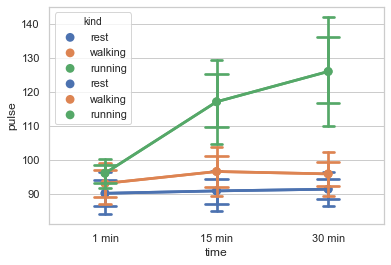

In [5]:
sns.pointplot(data=df, x="time", y="pulse", 
              hue="kind", capsize=.2)
sns.pointplot(data=df, x="time", y="pulse", 
              hue="kind", ci="sd", capsize=.1)

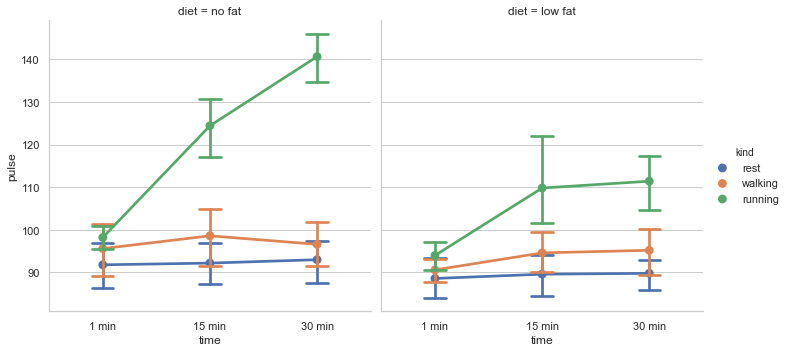

In [6]:
sns.catplot(data=df, x="time", y="pulse", 
            kind="point", hue="kind", capsize=.2, col="diet")

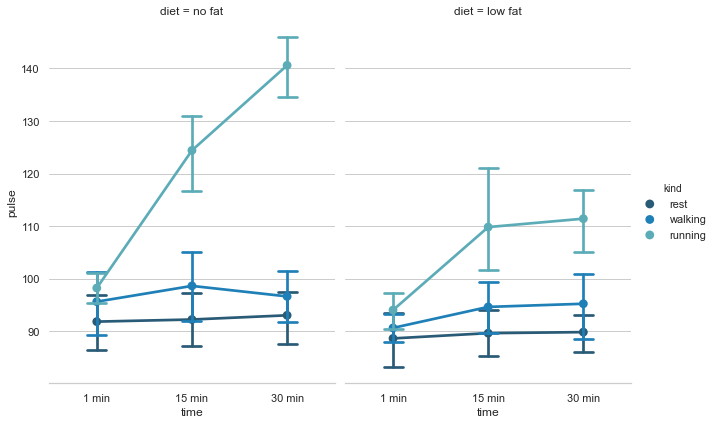

In [7]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

## 맥박수에 대한 분산과 표준편차 구하기

In [8]:
rest = df.query("kind=='rest'")["pulse"]
rest.var()

34.00574712643678

In [9]:
# 표준편차
rest.var() ** 0.5

5.831444686047942

In [10]:
import numpy as np
np.sqrt(rest.var())

5.831444686047942

In [11]:
walking = df.query("kind=='walking'")["pulse"]
walking.var()

45.95862068965517

In [12]:
np.sqrt(walking.var())

6.779278773561032

In [13]:
running = df.query("kind=='running'")["pulse"]
running.var()

310.4781609195402

In [14]:
np.sqrt(running.var())

17.62039048714699

## 분포를 통해 맥박수 표현하기

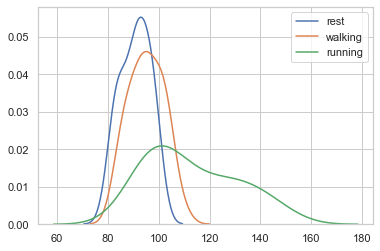

In [15]:
sns.kdeplot(rest, label="rest")
sns.kdeplot(walking, label="walking")
sns.kdeplot(running, label="running")

## FacetGrid 를 통해 catplot 처럼 그리기

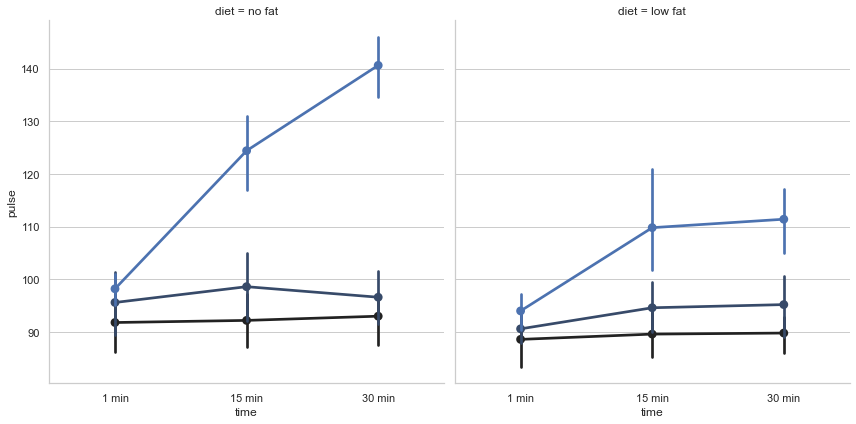

In [17]:
g = sns.FacetGrid(df, col="diet", height=6)
g.map(sns.pointplot, "time", "pulse", "kind")